In [552]:
# Reload all modules (except those excluded by %aimport) every time before executing the Python code typed.
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import collections
import functools
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from numpy.random import default_rng
from matplotlib.animation import FuncAnimation
from task1_environment.environment.main import PacMan
from task1_environment.policy.baseline import blinky_policy
from task1_environment.tool.save_load import save_default_dict, load_default_dict
from task2_qlearning_tiancheng_wang.train import train
from task2_qlearning_tiancheng_wang.eval import check_win_rate, plot_data, prepare_animation
from task2_qlearning_tiancheng_wang.q_policy import q_policy
from task2_qlearning_tiancheng_wang.q_state import simple_state, relative_state

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Animation presentation

hard mode

load q table, may take a few seconds

In [555]:
h_qtable_ani = load_default_dict('./task2_qlearning_tiancheng_wang/qtable/h_qtable_simple.txt')

initiate game and assign to advance poliy to the enemy 'blinky'

In [556]:
hard_game_ani = PacMan(maze_row_num=2, maze_column_num=2, maze_row_height=2, maze_column_width=2)
hard_game_ani.blinky.policy = blinky_policy

Generate animation, please run a few times to see how agent perform generally, the two cells above only needs to be run once

Pink --> agent  
bright yellow --> blinky (enemy)  
yellow --> inky (enemy)  
purple --> dots  
orange --> path  


In [557]:
hard_game_ani = prepare_animation(hard_game_ani, q_policy, simple_state, h_qtable_ani)
hard_game_ani.generate_animation()
HTML(hard_game_ani.animation.to_jshtml())

Generated frames: 36

easy mode

In [524]:
e_qtable_ani = load_default_dict('./task2_qlearning_tiancheng_wang/qtable/simple.txt')

In [525]:
easy_game_ani = PacMan(maze_row_num=2, maze_column_num=2, maze_row_height=2, maze_column_width=2)

In [526]:
easy_game_ani = prepare_animation(easy_game_ani, q_policy, simple_state, e_qtable_ani)
easy_game_ani.generate_animation()
HTML(easy_game_ani.animation.to_jshtml())

Generated frames: 98

# Workflow of task 2 Q-learning from below

# Set up
Before training, create q table, which is a default dictionary, return 1 if key does not exist

In [318]:
q_table = collections.defaultdict(lambda :1)

Initiate game

In [319]:
game = PacMan(maze_row_num=2, maze_column_num=2, maze_row_height=2, maze_column_width=2)

# Training

start training with hyper-parameters, training function with return 
1. list of total reward of each game
2. list of each mean evaluation reward of 100 (the games_per_eval parameter) games
3. list of each mean evaluation total living time
4. list of each mean evaluation winning times

In [320]:
rewards,eval_reward,eval_living_time,eval_win = \
train(
    game=game, 
    state_func=simple_state,
    q_table=q_table,
    total_episode=50000,
    epsilon=0.05,
    alpha=0.05,
    gamma=0.99,
    evaluate_every=1000,
    games_per_eval=100
)

training progress: 100.0%

# Evaluation

Below is the plot of the total rewards. As the rewards of each game highly fluctuate, it is not clear see the improvement along with time, but we can have a look at the evaluation stats further down.

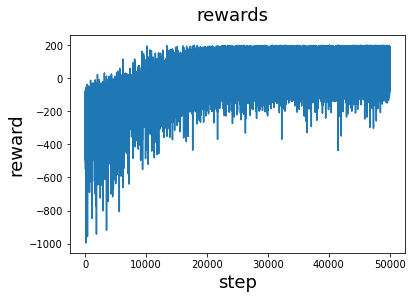

In [321]:
plot_data(rewards, 
          './task2_qlearning_tiancheng_wang/graph/reward.jpg', 
          'rewards', 
          'step', 
          'reward'
         )

This is the plot of evaluation rewards. We can clearly see the improvement.

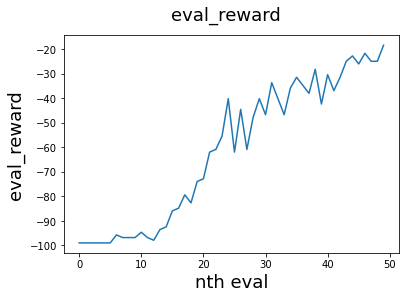

In [322]:
plot_data(eval_reward, 
          './task2_qlearning_tiancheng_wang/graph/eval_reward.jpg', 
          'eval_reward', 
          'nth eval', 
          'eval_reward'
         )

This is the plot of mean living time of the agent in each game during each evaluatition. Again we can see improvement clearly.

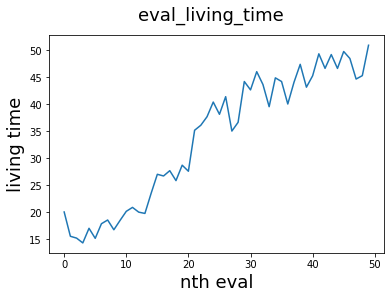

In [323]:
plot_data(eval_living_time, 
          './task2_qlearning_tiancheng_wang/graph/eval_living_time.jpg', 
          'eval_living_time', 
          'nth eval', 
          'living time'
         )

The plot of total wins of each evaluation (out of 100 games as set above in the training function argument)

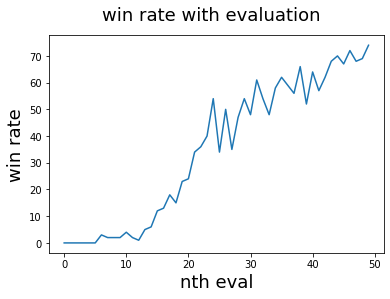

In [324]:
plot_data(eval_win, 
          './task2_qlearning_tiancheng_wang/graph/eval_win_rate.jpg', 
          'win rate with evaluation', 
          'nth eval', 
          'win rate'
         )

In [328]:
wr = check_win_rate(game=game, state_func=simple_state, q_table=q_table, total_games=1000)
print(f'win rate: {wr:.1%}')

win rate: 72.0%


save q table

In [329]:
save_default_dict(q_table, './task2_qlearning_tiancheng_wang/qtable/simple.txt')

check if q table is successfully saved

In [330]:
tmp = load_default_dict('./task2_qlearning_tiancheng_wang/qtable/simple.txt')
print(tmp == q_table)
del tmp

True


In [331]:
len(q_table)

388236

# Compare with relative state representation

 

In [386]:
qtable_relative = collections.defaultdict(lambda :1)
r_game = PacMan(maze_row_num=2, maze_column_num=2, maze_row_height=2, maze_column_width=2)

In [387]:
r_rewards,r_eval_reward,r_eval_living_time,r_eval_win = \
train(
    game=r_game, 
    state_func=relative_state,
    q_table=qtable_relative,
    total_episode=50000,
    epsilon=0.05,
    alpha=0.05,
    gamma=0.99,
    evaluate_every=1000,
    games_per_eval=100
)

training progress: 100.0%

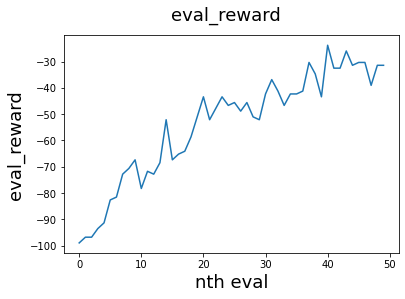

In [399]:
plot_data(r_eval_reward, 
          './task2_qlearning_tiancheng_wang/graph/r_eval_reward.jpg', 
          'eval_reward', 
          'nth eval', 
          'eval_reward'
         )

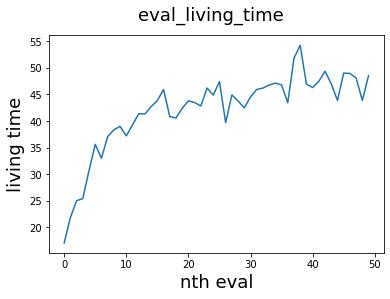

In [400]:
plot_data(r_eval_living_time, 
          './task2_qlearning_tiancheng_wang/graph/r_eval_living_time.jpg', 
          'eval_living_time', 
          'nth eval', 
          'living time'
         )

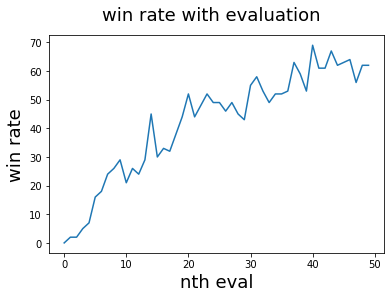

In [401]:
plot_data(r_eval_win, 
          './task2_qlearning_tiancheng_wang/graph/r_eval_win_rate.jpg', 
          'win rate with evaluation', 
          'nth eval', 
          'win rate'
         )

In [404]:
wr = check_win_rate(game=r_game, state_func=relative_state, q_table=qtable_relative, total_games=1000)
print(f'win rate: {wr:.1%}')

win rate: 64.8%


In [403]:
len(qtable_relative)

170828

In [393]:
save_default_dict(qtable_relative, './task2_qlearning_tiancheng_wang/qtable/relative.txt')

In [394]:
# max([v for k,v in qtable_relative.items()])

In [395]:
tmp = load_default_dict('./task2_qlearning_tiancheng_wang/qtable/relative.txt')
print(tmp == qtable_relative)
del tmp

True


### Conclusion

The performance of relative state is about 5% lower than the simple state, but the size of relative state is less than half of the size of simple state. Moreover, due to the smaller size, the Q-learning policy converges very quickly at the early stage of the training. Therefore, the relative state representation will be used to fine tune the hyper paramter due to the limitation of time and computation power.

# Fine tuning hyper parameter alpha, gamma and epsilon

In [ ]:
qtable_f = collections.defaultdict(lambda :1)
f_game = PacMan(maze_row_num=2, maze_column_num=2, maze_row_height=2, maze_column_width=2)

In [469]:
alpha_range = np.linspace(0.05, 0.1, 2)
gamma_range = np.linspace(0.9, 1, 2)
epsilon_range = np.linspace(0.05, 0.1, 2)
print(alpha_range, gamma_range, epsilon)

[0.05 0.1 ] [0.9 1. ] [0.05 0.1 ]


In [471]:
metric = np.zeros((2,2,2))

In [477]:
for i, alpha in enumerate(alpha_range):
    for j, gamma in enumerate(gamma_range):
        for k, epsilon in enumerate(epsilon_range):
            qtable_f = qtable_f = collections.defaultdict(lambda :1)
            f_game = PacMan(maze_row_num=2, maze_column_num=2, maze_row_height=2, maze_column_width=2)
            _,_,f_eval_living_time,_ = \
            train(
                game=f_game, 
                state_func=relative_state,
                q_table=qtable_f,
                total_episode=5000,
                epsilon=epsilon,
                alpha=alpha,
                gamma=gamma,
                evaluate_every=5000,
                games_per_eval=100
            )
            metric[i,j,k]=f_eval_living_time[-1]

training progress: 100.0%

In [478]:
metric

array([[[16.  , 13.99],
        [14.73, 18.32]],

       [[13.02, 16.1 ],
        [14.89, 17.42]]])

In [488]:
for i, alpha in enumerate(alpha_range):
    for j, gamma in enumerate(gamma_range):
        for k, epsilon in enumerate(epsilon_range):
            print(f'average living time with alpha: {alpha}, gamma: {gamma}, epsilon: {epsilon} -----> {metric[i,j,k]}')

average living time with alpha: 0.05, gamma: 0.9, epsilon: 0.05 -----> 16.0
average living time with alpha: 0.05, gamma: 0.9, epsilon: 0.1 -----> 13.99
average living time with alpha: 0.05, gamma: 1.0, epsilon: 0.05 -----> 14.73
average living time with alpha: 0.05, gamma: 1.0, epsilon: 0.1 -----> 18.32
average living time with alpha: 0.1, gamma: 0.9, epsilon: 0.05 -----> 13.02
average living time with alpha: 0.1, gamma: 0.9, epsilon: 0.1 -----> 16.1
average living time with alpha: 0.1, gamma: 1.0, epsilon: 0.05 -----> 14.89
average living time with alpha: 0.1, gamma: 1.0, epsilon: 0.1 -----> 17.42


The best hypyter paramters for early stage training are alpha 0.05, gamma 1.0 epsilon 0.1 in this comparison.

# Would it work to use the same Q table for the harder mode?

The enemy ghost will chase the agent forever by setting
```
h_game.blinky.policy = blinky_policy
```

In [499]:
h_game = PacMan(maze_row_num=2, maze_column_num=2, maze_row_height=2, maze_column_width=2)
h_game.blinky.policy = blinky_policy

In [492]:
simple_qtable = load_default_dict('./task2_qlearning_tiancheng_wang/qtable/simple.txt')

It seems to work even though the performance drop significantly.

In [496]:
wr = check_win_rate(game=h_game, state_func=simple_state, q_table=simple_qtable, total_games=1000)
print(f'win rate: {wr:.1%}')

win rate: 15.9%


In [497]:
relative_qtable = load_default_dict('./task2_qlearning_tiancheng_wang/qtable/relative.txt')

The relative state representation policy also works, the performance is slightly lower than the simple state policy.

In [498]:
wr = check_win_rate(game=h_game, state_func=relative_state, q_table=relative_qtable, total_games=1000)
print(f'win rate: {wr:.1%}')

win rate: 11.7%


### training from sctrach for the harder mode

In [500]:
h_qtable_simple = collections.defaultdict(lambda :1)
_, _, _, h_eval_win = train(
    game=h_game, 
    state_func=simple_state,
    q_table=h_qtable_simple,
    total_episode=50000,
    epsilon=0.05,
    alpha=0.05,
    gamma=0.99,
    evaluate_every=1000,
    games_per_eval=100
)

training progress: 100.0%

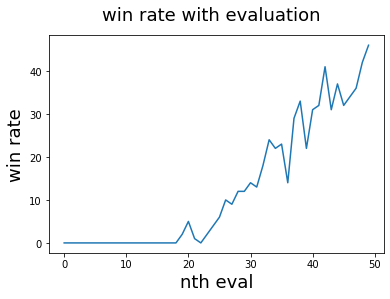

In [503]:
plot_data(h_eval_win, 
          './task2_qlearning_tiancheng_wang/graph/simple_eval_win_rate_hard_mode.jpg', 
          'win rate with evaluation', 
          'nth eval', 
          'win rate'
         )

In [502]:
wr = check_win_rate(game=h_game, state_func=simple_state, q_table=h_qtable_simple, total_games=1000)
print(f'win rate: {wr:.1%}')

win rate: 37.6%


The performance is still increasting at the same speed, would be interesting to see what the performance will be after training another 50000 steps

In [504]:
_, _, _, h_eval_win = train(
    game=h_game, 
    state_func=simple_state,
    q_table=h_qtable_simple,
    total_episode=50000,
    epsilon=0.05,
    alpha=0.05,
    gamma=0.99,
    evaluate_every=1000,
    games_per_eval=100
)

training progress: 100.0%

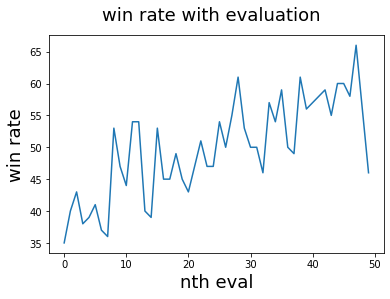

In [505]:
plot_data(h_eval_win, 
          './task2_qlearning_tiancheng_wang/graph/simple_eval_win_rate_hard_mode.jpg', 
          'win rate with evaluation', 
          'nth eval', 
          'win rate'
         )

In [506]:
wr = check_win_rate(game=h_game, state_func=simple_state, q_table=h_qtable_simple, total_games=1000)
print(f'win rate: {wr:.1%}')

win rate: 57.5%


In [507]:
save_default_dict(h_qtable_simple, './task2_qlearning_tiancheng_wang/qtable/h_qtable_simple.txt')

In [508]:
tmp = load_default_dict('./task2_qlearning_tiancheng_wang/qtable/h_qtable_simple.txt')
print(tmp == h_qtable_simple)
del tmp

True


Conclusion

The performance is good and it may still improve with further training.